In [340]:
%matplotlib inline

# import modules & set up logging
import gensim, logging
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
input_file = '../data/input/hist_tweets.csv'
df = pd.read_csv(input_file)
print('Total {} tweets'.format(len(df)))

In [344]:
df.head()

,created_at,favorite_count,id,lang,retweet_count,text,user
0,Thu Mar 16 04:16:07 +0000 2017,76.0,842227957863223297,en,39.0,The world's oldest golf club is now open to wo...,807095
1,Thu Mar 16 04:04:04 +0000 2017,67.0,842224924227964929,en,30.0,"""They call it dangerous and against Islam. But...",807095
2,Thu Mar 16 03:52:02 +0000 2017,190.0,842221896682860546,en,76.0,The Fed seems to believe that after nearly 8 y...,807095
3,Thu Mar 16 03:40:05 +0000 2017,NaN,842218887294918657,en,23.0,RT @MichaelPaulson: One more photo from @wecom...,807095
4,Thu Mar 16 03:35:02 +0000 2017,54.0,842217618723508224,en,26.0,Is your NCAA knowledge as good as your trash-t...,807095


In [345]:
sentences = [t.text.lower().split() for index, t in df.iterrows()]

In [346]:
def text_to_words(t):
    # 1. Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", t)
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))
    add_stops = set(['rt', 'http', 'https'])
    stops = stops.union(add_stops)
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]
    
    return(meaningful_words)

In [347]:
df['sentences'] = df.apply(lambda x: text_to_words(x.text), axis=1)

In [348]:
df.head()

,created_at,favorite_count,id,lang,retweet_count,text,user,sentences
0,Thu Mar 16 04:16:07 +0000 2017,76.0,842227957863223297,en,39.0,The world's oldest golf club is now open to wo...,807095,"[world, oldest, golf, club, open, women, co, r..."
1,Thu Mar 16 04:04:04 +0000 2017,67.0,842224924227964929,en,30.0,"""They call it dangerous and against Islam. But...",807095,"[call, dangerous, islam, neighbors, young, old..."
2,Thu Mar 16 03:52:02 +0000 2017,190.0,842221896682860546,en,76.0,The Fed seems to believe that after nearly 8 y...,807095,"[fed, seems, believe, nearly, years, trying, r..."
3,Thu Mar 16 03:40:05 +0000 2017,NaN,842218887294918657,en,23.0,RT @MichaelPaulson: One more photo from @wecom...,807095,"[michaelpaulson, one, photo, wecomefromaway, t..."
4,Thu Mar 16 03:35:02 +0000 2017,54.0,842217618723508224,en,26.0,Is your NCAA knowledge as good as your trash-t...,807095,"[ncaa, knowledge, good, trash, talk, co, pki, ..."


In [349]:
sentences = df.sentences.tolist()

In [350]:
sentences[0]

['world', 'oldest', 'golf', 'club', 'open', 'women', 'co', 'rkorjkabps']

In [351]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
 
model = gensim.models.Word2Vec(sentences, min_count=5)

2017-03-16 17:58:56,311 : INFO : collecting all words and their counts
2017-03-16 17:58:56,313 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-03-16 17:58:56,357 : INFO : PROGRESS: at sentence #10000, processed 131031 words, keeping 30350 word types
2017-03-16 17:58:56,416 : INFO : PROGRESS: at sentence #20000, processed 260681 words, keeping 49829 word types
2017-03-16 17:58:56,467 : INFO : PROGRESS: at sentence #30000, processed 383693 words, keeping 68821 word types
2017-03-16 17:58:56,519 : INFO : PROGRESS: at sentence #40000, processed 501903 words, keeping 84887 word types
2017-03-16 17:58:56,590 : INFO : PROGRESS: at sentence #50000, processed 620139 words, keeping 101561 word types
2017-03-16 17:58:56,654 : INFO : PROGRESS: at sentence #60000, processed 740335 words, keeping 115164 word types
2017-03-16 17:58:56,698 : INFO : collected 128463 word types from a corpus of 852296 raw words and 69037 sentences
2017-03-16 17:58:56,699 : INFO : Loading 

In [352]:
model.most_similar(positive=['breaking', 'news'], negative=['old'], topn=3)

2017-03-16 17:58:59,716 : INFO : precomputing L2-norms of word weight vectors


[('cia', 0.847872257232666),
 ('wikileaks', 0.8343443274497986),
 ('bezos', 0.807282567024231)]

In [353]:
model.doesnt_match("breakfast cereal dinner lunch".split())

'dinner'

In [354]:
model.similarity('woman', 'man')

0.9487660909957607

## Google pretrained model

In [355]:
google_file = '/Users/zubo/Datasets/Word2Vec/GoogleNews-vectors-negative300.bin'
model_g = gensim.models.KeyedVectors.load_word2vec_format(google_file, binary=True)
# model_g = model

2017-03-16 17:58:59,782 : INFO : loading projection weights from /Users/zubo/Datasets/Word2Vec/GoogleNews-vectors-negative300.bin
2017-03-16 17:59:46,380 : INFO : loaded (3000000, 300) matrix from /Users/zubo/Datasets/Word2Vec/GoogleNews-vectors-negative300.bin


In [356]:
model_g.similarity('woman', 'man')

0.76640122309953518

In [357]:
word = 'rkorjkabps'
if word in model_g:
    print(model_g[word])
else:
    print('No word "{}" in a vocabulary'.format(word))

No word "rkorjkabps" in a vocabulary


In [358]:
[word in model_g for word in sentences[0]]

[True, True, True, True, True, True, True, False]

In [359]:
vectors = [model[word] for word in sentences[0] if word in model]

In [360]:
avg_vector = np.mean(vectors, axis=0)

In [361]:
print(len(avg_vector))
print(avg_vector)

100
[ -5.12198135e-02   4.99166518e-01  -4.80726153e-01   1.62874416e-01
   2.28836641e-01   6.90242723e-02  -3.40505540e-01  -5.44730425e-02
   9.75900292e-02  -1.66975893e-02   7.49809220e-02  -2.80265838e-01
   5.93517840e-01   4.39436227e-01   4.85264927e-01   2.55477726e-01
  -3.63610923e-01  -1.84110235e-02  -1.04440935e-01  -3.17772120e-01
   3.26018155e-01   4.87235397e-01   3.16727581e-03   6.98925078e-01
  -1.00164779e-01   2.44270787e-01   1.77083746e-01  -1.87073946e-01
  -4.56259012e-01   5.20500779e-01   2.97380596e-01  -1.74942687e-01
   4.30269778e-01   5.29321909e-01  -2.74422258e-01  -3.96813929e-01
  -1.35954395e-01   3.78939301e-01  -3.40585053e-01  -4.38812934e-02
   1.88534960e-01   1.42334655e-01   6.82094097e-02   6.57810420e-02
  -3.41786146e-01   2.85924584e-01  -3.20867687e-01  -2.45651435e-02
   1.31933674e-01  -4.28239852e-01  -3.36862989e-02   1.37184680e-01
   4.10868935e-02   8.74303933e-03  -5.00453711e-01   6.27462799e-03
   4.50151303e-04  -1.65055782

In [362]:
np.mean([vector[0] for vector in vectors])

-0.051219814

## Average vectors for sentences

In [363]:
vectors = list()
for sentence in sentences:
    vectors.append([model[word] for word in sentence
                    if word in model])

In [364]:
# Google
vectors_g = list()
for sentence in sentences:
    vectors_g.append([model_g[word] for word in sentence
                    if word in model_g])

In [365]:
avg_vectors = [np.mean(sentence_vectors, axis=0)
               for sentence_vectors in vectors]
avg_vectors_g = [np.mean(sentence_vectors, axis=0)
               for sentence_vectors in vectors_g]

In [366]:
print(len(vectors), len(vectors_g), 
      len(avg_vectors), len(avg_vectors_g))

69037 69037 69037 69037


In [367]:
avg_vectors[0]

array([ -5.12198135e-02,   4.99166518e-01,  -4.80726153e-01,
         1.62874416e-01,   2.28836641e-01,   6.90242723e-02,
        -3.40505540e-01,  -5.44730425e-02,   9.75900292e-02,
        -1.66975893e-02,   7.49809220e-02,  -2.80265838e-01,
         5.93517840e-01,   4.39436227e-01,   4.85264927e-01,
         2.55477726e-01,  -3.63610923e-01,  -1.84110235e-02,
        -1.04440935e-01,  -3.17772120e-01,   3.26018155e-01,
         4.87235397e-01,   3.16727581e-03,   6.98925078e-01,
        -1.00164779e-01,   2.44270787e-01,   1.77083746e-01,
        -1.87073946e-01,  -4.56259012e-01,   5.20500779e-01,
         2.97380596e-01,  -1.74942687e-01,   4.30269778e-01,
         5.29321909e-01,  -2.74422258e-01,  -3.96813929e-01,
        -1.35954395e-01,   3.78939301e-01,  -3.40585053e-01,
        -4.38812934e-02,   1.88534960e-01,   1.42334655e-01,
         6.82094097e-02,   6.57810420e-02,  -3.41786146e-01,
         2.85924584e-01,  -3.20867687e-01,  -2.45651435e-02,
         1.31933674e-01,

In [368]:
df['avg_vector'] = avg_vectors
df['avg_vector_g'] = avg_vectors_g

## Tweets per day

In [369]:
# Dates 'created_at' not unique:
len(df) - len(df.created_at.unique())

2710

In [370]:
# Convert to datetime
df['dt'] = pd.to_datetime(df.created_at)

In [371]:
df.dt[0].hour

4

In [372]:
grouped_day = df.groupby(df['dt'].map(lambda x: x.date()))

tweets_per_day = grouped_day.dt.count()

tweets_per_day

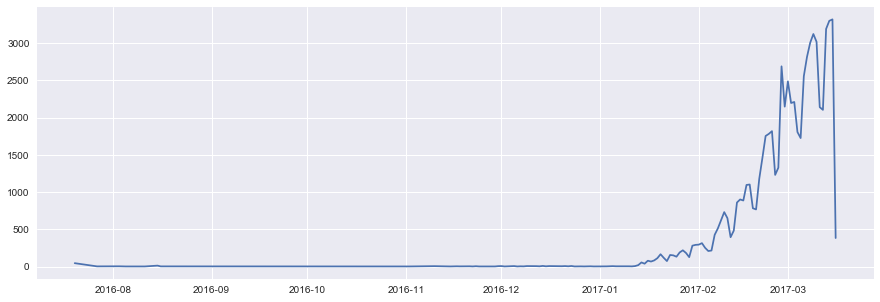

In [375]:
plt.figure(figsize=(15,5))
plt.plot(tweets_per_day)

## K-means for all tweets

In [376]:
df.tail()

,created_at,favorite_count,id,lang,retweet_count,text,user,sentences,avg_vector,avg_vector_g,dt
69032,Fri Feb 24 20:35:06 +0000 2017,59.0,835226570461696003,en,39.0,These 3 counties could have flipped the 2016 e...,14293310,"[counties, could, flipped, election, hillary, ...","[0.146926, 0.169684, -0.580357, 0.203427, -0.1...","[-0.0326172, 0.0321167, -0.00830307, 0.127155,...",2017-02-24 20:35:06
69033,Fri Feb 24 20:30:06 +0000 2017,94.0,835225311373627396,en,93.0,Kansas shooting victim's father warns Indian p...,14293310,"[kansas, shooting, victim, father, warns, indi...","[-0.0366573, 0.689207, -0.475937, 0.161824, 0....","[-0.0503152, -0.000549316, 0.0387518, 0.134588...",2017-02-24 20:30:06
69034,Fri Feb 24 20:20:07 +0000 2017,51.0,835222800491294721,en,41.0,The Internet already has some amazing names fo...,14293310,"[internet, already, amazing, names, nasa, new,...","[0.0434135, 0.393781, -0.4351, 0.238261, -0.01...","[0.00876194, 0.0414361, 0.0324029, 0.0644463, ...",2017-02-24 20:20:07
69035,Fri Feb 24 20:11:49 +0000 2017,670.0,835220708477308928,en,310.0,See how Meryl Streep reacted to every one of h...,14293310,"[see, meryl, streep, reacted, every, one, osca...","[0.115015, 0.689542, -0.279323, 0.104871, 0.00...","[-0.153727, -0.0620355, 0.0179036, 0.0289442, ...",2017-02-24 20:11:49
69036,Fri Feb 24 20:00:28 +0000 2017,26.0,835217854496706560,en,12.0,Should you buy the Nintendo Switch? Here?s how...,14293310,"[buy, nintendo, switch, decide, co, wcpsfveu]","[0.111213, 0.32377, -0.325466, 0.173055, -0.07...","[0.00983887, -0.0367187, 0.00449219, 0.159424,...",2017-02-24 20:00:28


In [377]:
X = np.array(df.avg_vector.tolist(), ndmin=2)

In [378]:
X.shape

(69037, 100)

In [379]:
# kmeans = KMeans(n_clusters=20, random_state=0).fit(X)
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
kmeans.labels_

kmeans.cluster_centers_


array([[  2.55119592e-01,   4.00692433e-01,  -8.17125916e-01,
          2.35350966e-01,  -4.08618480e-01,  -1.40297562e-01,
         -6.88625649e-02,  -2.57175267e-01,   2.34878689e-01,
          7.52583742e-02,   5.02110004e-01,  -1.62980437e-01,
          6.61853194e-01,   1.83695525e-01,   7.58459568e-01,
          6.78701103e-01,   9.90167409e-02,  -1.11932382e-01,
         -8.45166296e-02,  -6.13621712e-01,   2.33757362e-01,
          4.33373690e-01,   5.19254729e-02,   6.98715806e-01,
         -1.59127444e-01,   5.88871203e-02,   9.24922153e-02,
         -8.95157009e-02,  -1.11878142e-01,  -2.25974753e-01,
         -1.24775171e-02,  -4.58515018e-01,   5.48157275e-01,
          5.10980725e-01,  -5.22743106e-01,  -4.93189633e-01,
         -2.42555186e-01,   1.07732251e-01,  -2.99459010e-01,
          1.15841448e-01,   2.94252217e-01,   2.18388900e-01,
         -4.10411432e-02,  -2.12219909e-01,  -1.72437727e-03,
          2.88701594e-01,  -2.45627373e-01,  -2.87184298e-01,
        

In [380]:
len(kmeans.labels_)

69037

In [381]:
df['cluster'] = kmeans.labels_

In [382]:
df[df.cluster == 1].text.tolist()

['BBC\'s "Countryfile" is perhaps best described as pastoral porn https://t.co/4yr8xwgLLY',
 'The best countries in the world, per a new survey:\n1. ??\n2. ??\n3. ??\n4. ??\n https://t.co/SqOP4uK83n',
 'The best countries in the world, per a new survey:\n1. ??\n2. ??\n3. ??\n4. ??\n https://t.co/ZWYBE72GEF',
 '?Saturday Night Live? Shows a Milder Political Side https://t.co/EM8DMgt9Fe',
 'Will the Oscar wins give "Moonlight" a box-office bump? https://t.co/UIB9RqLSg3',
 'The best movies and TV shows new to Netflix, Hulu, Amazon and HBO in March https://t.co/okBpW4fPdK https://t.co/nkGKqzsVXn',
 'Moviegoers in London expecting to see "Moonlight" were instead treated to the first 20 seconds of "La La Land" https://t.co/z3GV2aALft',
 'The best movies and TV shows new to Netflix, Hulu, Amazon and HBO in March https://t.co/bFxiO6HBlV https://t.co/3RCqKa7Lrk',
 'The best movies and TV shows new to Netflix, Hulu, Amazon and HBO in March https://t.co/FaFNqAU4o6 https://t.co/mNwABNg4I3',
 'The 

Result is not satisfying. Need more clusters. On less tweets.

## K-means for day-filtered tweets

In [383]:
df_day = df[(df['dt'] > '2017-03-06') & (df['dt'] < '2017-03-07')]

In [384]:
len(df_day)

2557

In [385]:
X = np.array(df_day.avg_vector.tolist(), ndmin=2)
X.shape

(2557, 100)

In [386]:
X_g = np.array(df_day.avg_vector_g.tolist(), ndmin=2)
X_g.shape

(2557, 300)

In [387]:
kmeans = KMeans(n_clusters=100).fit(X)

In [388]:
kmeans_g = KMeans(n_clusters=100).fit(X_g)

In [389]:
df_day['cluster'] = kmeans.labels_
df_day['cluster_g'] = kmeans_g.labels_

/Users/zubo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/zubo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [390]:
df_day[df_day.cluster_g == 4].text.tolist()

['The drive to Death Valley is lonely and beautiful https://t.co/eoBrh0pW9F',
 'Scorned lover made sick cannibal threats to his ex-girlfriend https://t.co/a1uWhZOVVP https://t.co/ky65G3AaeP',
 'RT @TheSunFootball: Marcos Rojo?s 17-year-old cousin tragically shot dead https://t.co/FGQjHXWd38 https://t.co/29pDfSpA2U',
 'EXCLUSIVE: Jeremy McConnell leaves Stephanie Davis and baby Caben to dash to his dad?s funeral? https://t.co/KhrBYE5SzM',
 "'My f***ing child is in the back': Road rage mum dragged another mother out of her BMW and battered her? https://t.co/JNzdKlieJV",
 'Fisherman have been left baffled after catching this bizarre... thing https://t.co/pHShqJTzl8 https://t.co/ZhT9NxO8jO',
 'A bouncer who killed his wife with her bra strap has had his sentence increased after he tried to clear his name? https://t.co/BbS6qi872f',
 "Mum ?attacked child killer Rose West in prison after getting annoyed at her fan mail' https://t.co/foO7fjglNH https://t.co/zNxa1Th2xb",
 "A mum offered her tee

In [391]:
df_day[df_day.cluster == 2].text.tolist()

['Will the Yankees send this prospect to the barber before they send him to the plate? A battle of tradition vs. style https://t.co/wX5iN2OpTI',
 'Pakistan has kept its border crossings with Afghanistan sealed for more than 2 weeks https://t.co/rKjVeEXCxg',
 'After the interracial couple refused to remove the slur to make a point about intolerance, someone covered it up https://t.co/VFge3Lu0iB',
 'After a visitor damaged a sculpture while taking a selfie, the Kusama exhibit at the Hirshhorn Museum has reopened https://t.co/PiQHjbARAy',
 "EXCLUSIVE: Princess Diana?s ?rock? Paul Burrell: 'I'm gay and marrying my lover' https://t.co/Cu8PvLattF https://t.co/Q2KVEV4ao0",
 'RT @danwootton: EXCLUSIVE #Strictly fans are livid after being quoted ?400 for selfies with their ballroom idols https://t.co/TSvrlRMCAP ht?',
 'RT @SunSport: EXCLUSIVE: Latest pictures of Upton Park will break West Ham hearts https://t.co/eA3YcFFGlM https://t.co/4QmIqMQLp7',
 'RT @TheSunWoman: Scans that can predict hear

In [392]:
df_day[df_day.cluster == 3].text.tolist()

['In Russia, a company has made the first on-site 3D printed house https://t.co/ubv5oFwa4o',
 'RT @AP_Politics: Louisiana Democrat apologizes for crude joke about White House adviser Kellyanne Conway. https://t.co/mi88xy3iyF',
 'White House press secretary Sean Spicer has not held an on-camera briefing in a week https://t.co/cDh3YLw8Wl https://t.co/wBEs78OKIb',
 'The White House is hoping changes in this #ExecutiveOrder will stop legal challenges that blocked the Jan. 27 order. https://t.co/ifaLIz6vHQ',
 'Pelosi punts on Democrat?s joke about Kellyanne Conway looking "familiar" kneeling on White House couch https://t.co/1h3HHW3KDM',
 'Rep. Cedric Richmond apologizes to White House adviser Kellyanne Conway over sofa joke https://t.co/ywgwCAyAar',
 'The FBI?s director may be readying for a major fight with the Trump White House. https://t.co/Ie2gFqJvjA https://t.co/bVqRm3QNiz',
 'White House does not know if alleged surveillance of Trump was by wiretap https://t.co/ieNWxIi6ML',
 'White H

Looks better than cluster for all 3-4 weeks tweets. Google pretrained vocabulary loks way better.

In [393]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, kmeans.labels_, metric='cosine'))

Silhouette Coefficient: 0.146


In [394]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_g, kmeans_g.labels_, metric='cosine'))

Silhouette Coefficient: 0.029


## Silhouette Coefficient

In [559]:
# ks = [10, 25, 50, 75, 100, 125, 150, 200, 250, 300, 350, 400]
ks = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 25, 50]
ks = list(range(11))
ks = [k*3+2 for k in ks]
ks

[2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32]

In [396]:
# grouped = df_day.groupby(df.dt.map(lambda x: x.hour))
# grouped.dt.count()

In [397]:
n_runs = 5

df_day = df[(df['dt'] > '2017-03-15 11:00:00') & (df['dt'] < '2017-03-15 13:00:00')]
X = np.array(df_day.avg_vector.tolist(), ndmin=2)
X_g = np.array(df_day.avg_vector_g.tolist(), ndmin=2)
X.shape

(374, 100)

In [398]:
sil = list()
for k in ks:
    print('Number of clusters = {} '.format(k), end='')
    sil_k = list()
    for n in range(1, n_runs + 1):
        print('.', end='')
        kmeans = KMeans(n_clusters=k, init='random').fit(X)
        sil_k.append(metrics.silhouette_score(X, kmeans.labels_, metric='cosine'))
    print('avg silhouette coeff = {}'.format(np.mean(sil_k)))
    sil.append(sil_k)

Number of clusters = 2 .....avg silhouette coeff = 0.45814746618270874
Number of clusters = 3 .....avg silhouette coeff = 0.3420904576778412
Number of clusters = 4 .....avg silhouette coeff = 0.3395000100135803
Number of clusters = 5 .....avg silhouette coeff = 0.32160747051239014
Number of clusters = 6 .....avg silhouette coeff = 0.3169940412044525
Number of clusters = 7 .....avg silhouette coeff = 0.3020787239074707
Number of clusters = 8 .....avg silhouette coeff = 0.3048998713493347
Number of clusters = 9 .....avg silhouette coeff = 0.266828715801239
Number of clusters = 10 .....avg silhouette coeff = 0.26673460006713867
Number of clusters = 11 .....avg silhouette coeff = 0.24018394947052002


In [399]:
# pd.DataFrame(sil, index=ks).to_csv('../data/output/silh.csv')

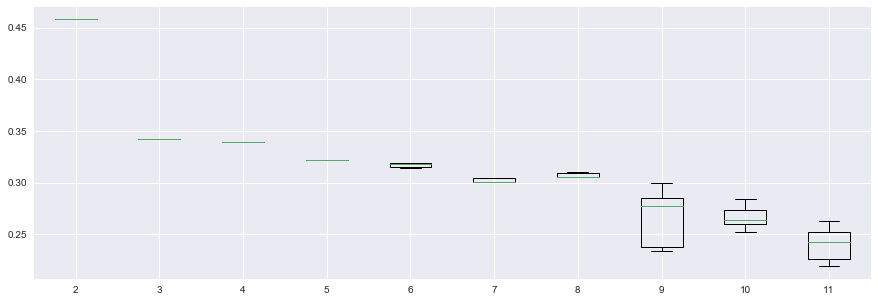

In [400]:
plt.figure(figsize=(15,5))
a = plt.boxplot(sil, labels = ks)
plt.savefig('../data/output/img/15-march-2hours-100vec.jpg')

In [725]:
kmeans = KMeans(n_clusters=32, init='random').fit(X_g)

In [726]:
df_day['cluster'] = kmeans.labels_
df_day['sil'] = metrics.silhouette_samples(X_g, kmeans.labels_, metric='cosine')

/Users/zubo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/zubo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [737]:
df_day[df_day.cluster == 5].sort_values(by=['sil'], ascending=False).head(20).text.tolist()

["RT @TelePolitics: Theresa May jokes that Jeremy Corbyn hasn't got the hang of #PMQs after he didn't ask a question https://t.co/9I0BEtDe45",
 ".@tamcohen and @ConHome's @wallaceme are taking your questions on the Tory #electionexpenses emails in a Facebook Live soon - head over now",
 'RT @Stone_SkyNews: For a hint of what a hard Brexit / no deal looks like,read this thread of @DavidDavisMP answering MPs questions https://?',
 'Watch @theresa_may answer questions from MPs live for #PMQs https://t.co/q8MHnc00H7',
 'Theresa May says Jeremy Corbyn "hasn\'t got the hang of this" at #PMQs https://t.co/qE9cYSZcb6',
 'Theresa May says Jeremy Corbyn is "just sitting there, going on protest marches" #PMQs https://t.co/ElwIAgPwut',
 '"When it comes to lectures on chaos he\'d be the first person I\'d turn to" - Theresa May on NI U-turn #PMQs https://t.co/CqnOS9kc73',
 "#Conservative election expenses: Sky's @tamcohen and @wallaceme answering your questions live on Facebook: https://t.co/yGE8UIy

In [728]:
sample_silhouette_values = metrics.silhouette_samples(X_g, kmeans.labels_, metric='cosine')
# sample_silhouette_values

In [729]:
sil_clusters = pd.DataFrame({'cluster': df_day.cluster, 'sil': sample_silhouette_values})

In [730]:
sil_clusters = sil_clusters.sort_values(by=['sil'], ascending=False, axis=0) \
    .reset_index(drop=True)
sil_clusters.head()

,cluster,sil
0,15,0.762362
1,15,0.756405
2,15,0.714364
3,15,0.712346
4,15,0.682567


In [731]:
grouped = sil_clusters.groupby('cluster')
col_order_sum = grouped.aggregate({'sil': {sum, 'count'}})['sil'].sort_values(by='sum', ascending=False)
col_order_sum = col_order_sum[col_order_sum['count'] > 10]
col_order_sum = list(col_order_sum.index)
print(col_order_sum)

[23, 17, 0, 4, 5, 16, 21, 24, 26, 1]


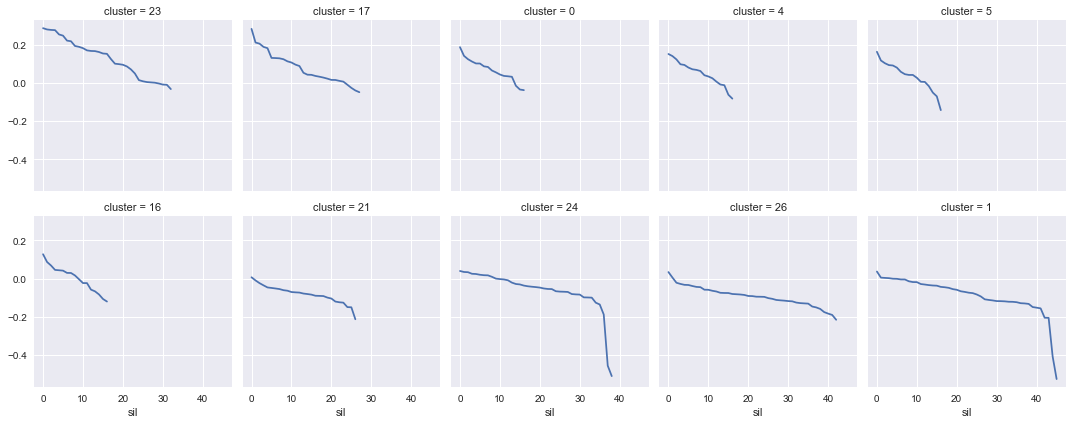

In [732]:
grid = sns.FacetGrid(sil_clusters, col="cluster", col_wrap=5, col_order=col_order_sum)
grid.map(plt.plot, 'sil')

In [656]:
grouped = sil_clusters.groupby('cluster')
col_order_sum = list(grouped.aggregate({'sil': {'sum': sum}})['sil'].sort_values(by='sum', ascending=False).index)
print(list(col_order_sum))

[22, 18, 24, 7, 15, 19, 8, 4, 10, 2, 0, 20, 21, 6, 13, 1, 12, 11, 9, 23, 5, 14, 17, 16, 25, 3]


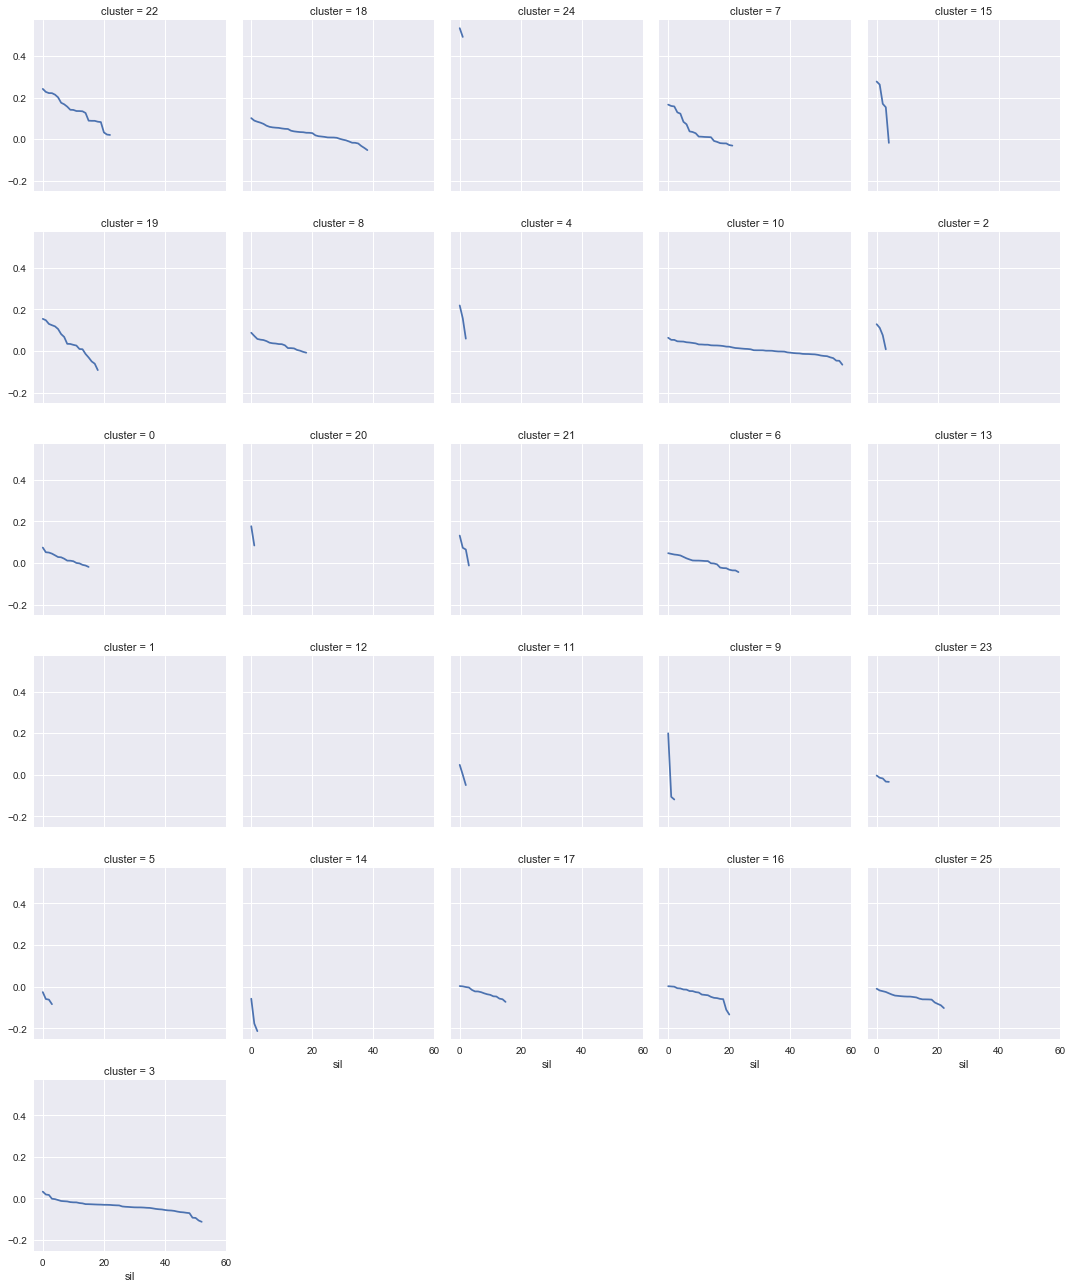

In [649]:
grid = sns.FacetGrid(sil_clusters, col="cluster", col_wrap=5, col_order=col_order_sum)
grid.map(plt.plot, 'sil')

In [650]:
col_order = list(sil_clusters.groupby('cluster')['sil'].max().sort_values(ascending=False).index)
print(col_order)

[24, 15, 22, 4, 9, 20, 7, 19, 21, 2, 18, 8, 0, 10, 11, 6, 3, 17, 16, 1, 12, 13, 23, 25, 5, 14]


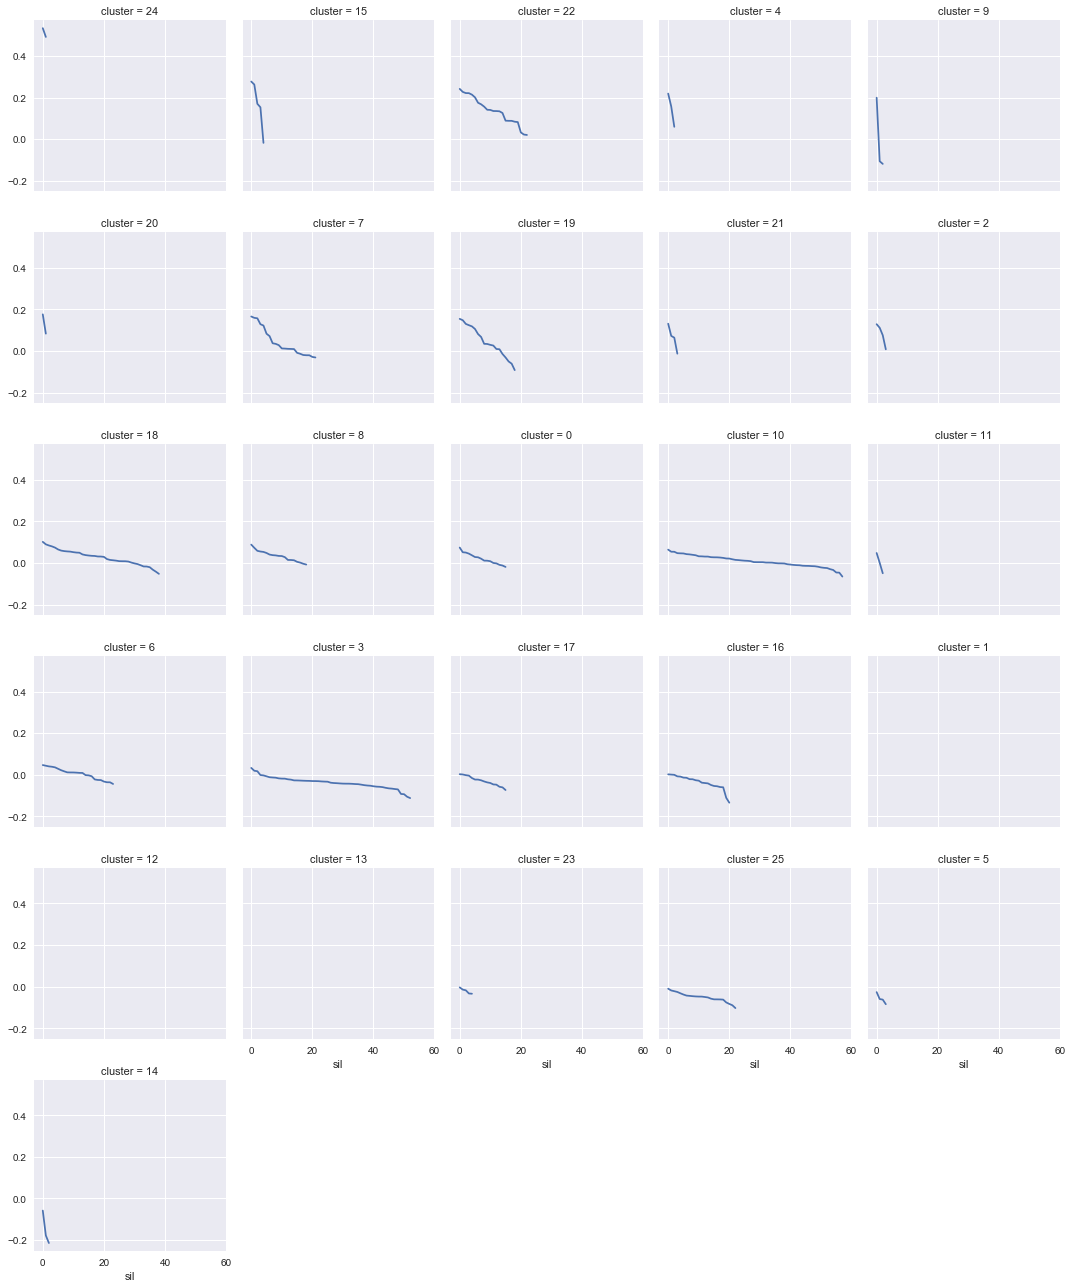

In [651]:
grid = sns.FacetGrid(sil_clusters, col="cluster", col_wrap=5, col_order=col_order)
grid.map(plt.plot, 'sil')

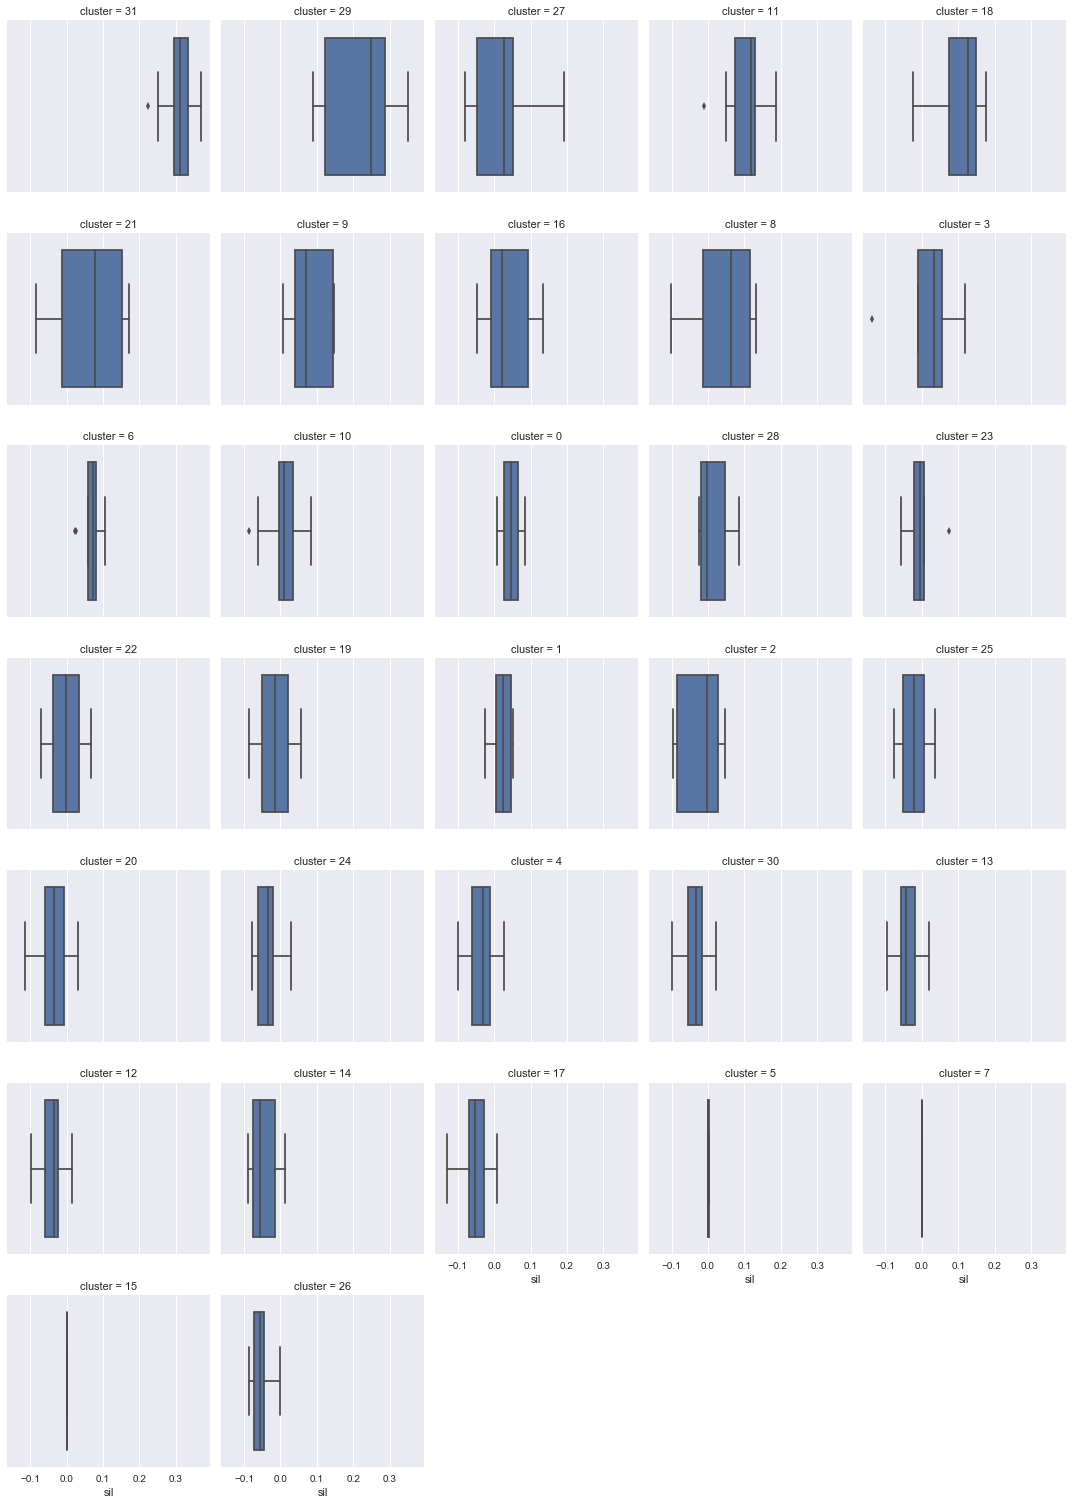

In [571]:
grid = sns.FacetGrid(sil_clusters, col="cluster", col_wrap=5, col_order=col_order)
grid.map(sns.boxplot, 'sil')

In [595]:
sil_g = list()
sil_max_g = list()
for k in ks:
    print('Number of clusters = {} '.format(k), end='')
    sil_k = list()
    sil_max_k = list()
    for n in range(1, n_runs + 1):
        print('.', end='')
        kmeans_g = KMeans(n_clusters=k, init='random').fit(X_g)
        sil_k.append(metrics.silhouette_score(X_g, kmeans_g.labels_, metric='euclidean'))
        silhouette_samples = metrics.silhouette_samples(X_g, kmeans_g.labels_, metric='euclidean')
        sil_max_k.append(max(silhouette_samples))
    print('avg silhouette coeff = {:.3f}, avg max = {:.3f}' \
          .format(np.mean(sil_k), np.mean(sil_max_k)))
    sil_g.append(sil_k)
    sil_max_g.append(sil_max_k)

Number of clusters = 2 .....avg silhouette coeff = 0.035, avg max = 0.142
Number of clusters = 5 .....avg silhouette coeff = 0.026, avg max = 0.261
Number of clusters = 8 .....avg silhouette coeff = 0.021, avg max = 0.255
Number of clusters = 11 .....avg silhouette coeff = 0.019, avg max = 0.336
Number of clusters = 14 .....avg silhouette coeff = 0.018, avg max = 0.490
Number of clusters = 17 .....avg silhouette coeff = 0.019, avg max = 0.567
Number of clusters = 20 .....avg silhouette coeff = 0.018, avg max = 0.468
Number of clusters = 23 .....avg silhouette coeff = 0.019, avg max = 0.563
Number of clusters = 26 .....avg silhouette coeff = 0.025, avg max = 0.512
Number of clusters = 29 .....avg silhouette coeff = 0.018, avg max = 0.464
Number of clusters = 32 .....avg silhouette coeff = 0.015, avg max = 0.511


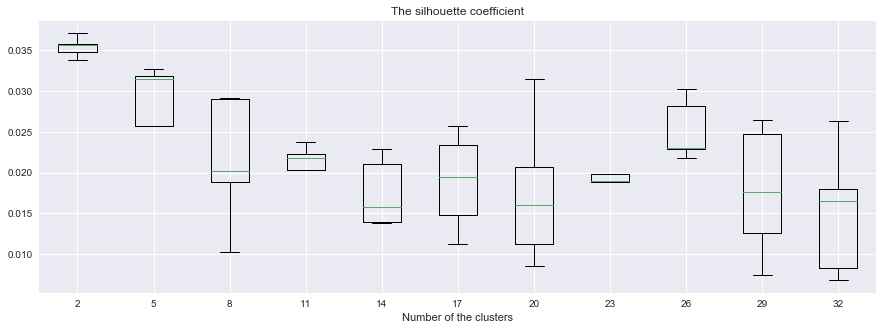

In [596]:
plt.figure(figsize=(15,5))
a = plt.boxplot(sil_g, labels = ks)
plt.xlabel('Number of the clusters')
plt.title('The silhouette coefficient')
# plt.savefig('../data/output/img/15-march-2hours-google-maxsil.jpg')

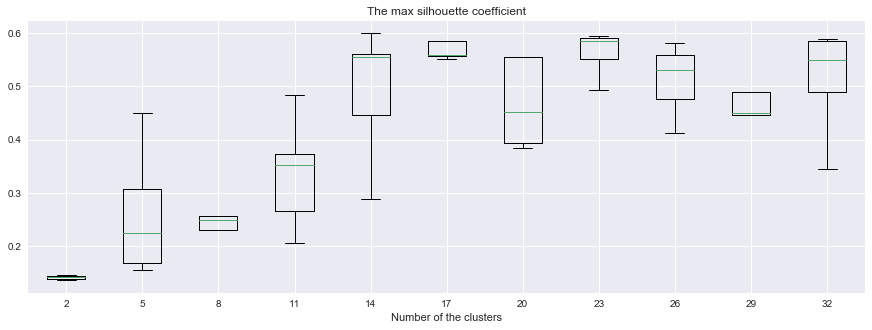

In [597]:
plt.figure(figsize=(15,5))
a = plt.boxplot(sil_max_g, labels = ks)
plt.xlabel('Number of the clusters')
plt.title('The max silhouette coefficient')